<a href="https://colab.research.google.com/github/venkataratnamb20/quicksilicon/blob/notebooks/notebooks/pysim/pyspice_runspice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PySpice


## Refs

- [ubuntu](https://manpages.ubuntu.com/manpages/noble/man1/ngspice.1.html)
- [archlinux](https://man.archlinux.org/man/ngspice.1.en)
- [gitlab](https://nmg.gitlab.io/ngspice-manual/startingngspice/servermodeoption-s.html)
- [ngspice.sourceforge](https://ngspice.sourceforge.io/tutorials.html)
- [ngspice.sourceforge: tutorial](https://ngspice.sourceforge.io/ngspice-control-language-tutorial.html)
- [ngspice.sourceforge: manual](https://ngspice.sourceforge.io/docs/ngspice-manual.pdf)


## Setup


In [1]:
import sys
import subprocess


def run_shell_stream(cmd: str):
    try:
        process = subprocess.Popen(cmd,
                                stdout = subprocess.PIPE,
                                stderr = subprocess.PIPE,
                                text = True,
                                shell = True)
    except:
        print(f'Failed to run command: {cmd}')
        print(f"Error: {sys.exc_info()}")
        return

    while True:
        output_err = ''
        output = ''
        if process.stderr is not None:
            output_err = process.stderr.readline().strip()
        if output_err != '':
            print(output_err)
        if process.stdout is not None:
            output = process.stdout.readline().strip()
        if output != '':
            print(output)

        return_code = process.poll()
        if return_code is not None:
            print(f'Returned the following return code: {return_code}')
            for std_output in process.stdout.readlines():
                print(std_output)
            for std_err in process.stderr.readlines():
                print(std_err)
            break

cmd = 'ls -al'
# cmd = "apt install python3-venv"
run_shell_stream(cmd)



total 16
Returned the following return code: 0
drwxr-xr-x 1 root root 4096 Jan  9 14:24 .

drwxr-xr-x 1 root root 4096 Jan 13 05:25 ..

drwxr-xr-x 4 root root 4096 Jan  9 14:24 .config

drwxr-xr-x 1 root root 4096 Jan  9 14:24 sample_data



In [2]:
run_shell_stream("ngspice -v || apt install ngspice")

/bin/sh: 1: ngspice: not found
Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
ngspice-doc
Returned the following return code: 0
The following NEW packages will be installed:

  ngspice

0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.

Need to get 2,352 kB of archives.

After this operation, 7,972 kB of additional disk space will be used.

Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 ngspice amd64 36+ds-1ubuntu0.1 [2,352 kB]

Fetched 2,352 kB in 0s (9,248 kB/s)

Selecting previously unselected package ngspice.

(Reading database ... 

(Reading database ... 5%

(Reading database ... 10%

(Reading database ... 15%

(Reading database ... 20%

(Reading database ... 25%

(Reading database ... 30%

(Reading database ... 35%

(Reading database ... 40%

(Reading database ... 45%

(Reading database ... 50%

(Reading database ... 55%

(Reading database ... 60%

(Reading database ... 65%

(Reading databas

## Examples

## RC Circuit


In [3]:
%%script ngspice -s -o pyspice.log

* test -s
v1 vin 0 1
r1 vin vout 2k
r2 vout 0 2k
c2 vout 0 1p
.options filetype=ascii
.save i(v1) v(vin) v(vout)
.dc v1 -1 1 0.05

.CONTROL
    save all
    run                                         ; run * the .tran command
    * set xbrushwidth=2                           ; set linewidth of graph
    * plot v(in) v(out)                           ; plot the simulation results
    set wr_singlescale            ; for wrdata: write the scale only once
    set wr_vecnames               ; for wrdata: write the vector names
    option numdgt = 3             ; for wrdata: 3 digits after decimal point
    wrdata $inputdir/threeloopsac.txt $writestr  ; write ac output v(10) into file for all runs
    rusage                        ; list some resource usage
    * write $inputdir/simout.out v(vin) v(vout)     ; write the results to a file
    wrdata simout.csv v(vin) v(vout)     ; write the results to a file
.ENDC
.end




******
** ngspice-36 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2020, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 11 21:44:53 UTC 2024
******

Server mode

Comments and warnings go to log-file: pyspice.log



In [15]:
import os

import pandas as pd

from enum import Enum

class AnalysisIndex(Enum):
    DC = 'v-sweep'
    AC = 'frequency'
    TRAN = 'time'

# def read_data_dc(filename: os.PathLike, analysis: str = 'tran'):
#     result = pd.read_csv(filename, sep='\s+', skip_blank_lines=True)
#     if analysis == 'tran':
#         result.set_index("time", inplace=True)
#     elif analysis == 'ac':
#         result.set_index("f", inplace=True)
#     else:
#         result.set_index("v-sweep", inplace=True)
#     return result

def read_data(filename: os.PathLike, analysis: str = 'tran'):
    result = pd.read_csv(filename, sep='\s+', skip_blank_lines=True)
    # get index col name from Enum
    index_col = AnalysisIndex.__members__[analysis.upper()].value
    # index_col = AnalysisIndex.__members__.get(analysis.upper(), AnalysisIndex.DC).value
    result.set_index(index_col, inplace=True)
    return result
result = read_data("simout.csv", analysis='dc')
result.head()

,v(vin),v(vout)
v-sweep,,
-1.00,-1.00,-0.500
-0.95,-0.95,-0.475
-0.90,-0.90,-0.450
-0.85,-0.85,-0.425
-0.80,-0.80,-0.400


In [5]:
AnalysisIndex.__members__['DC'].value
AnalysisIndex.__members__.get('DC', AnalysisIndex.DC).value

'v-sweep'

<Axes: xlabel='v-sweep'>

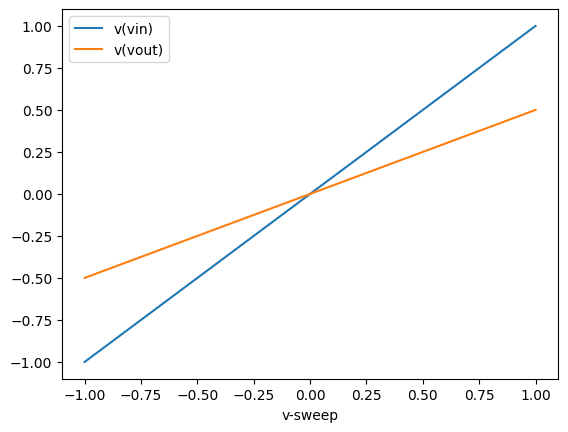

In [6]:
result.plot()

## RC LPF

### Sub Circuit


In [7]:
%%writefile rc_lpf.cir


* RC Filter
.SUBCKT rclpf VIN VOUT r1=2k r2=2k c2=1p
    r1 VIN VOUT {r1}
    r2 VOUT 0 {r2}
    c2 VOUT 0 {c2}
.ENDS rclpf

Writing rc_lpf.cir


### DC Sweep


In [8]:
%%script ngspice -s -o pyspice_dcsweep.log

* test -s
.INCLUDE rc_lpf.cir
v1 vin 0 1
Xrclpf1 vin vout rclpf
.options filetype=ascii
.save i(v1) v(vin) v(vout)
.dc v1 -1 1 0.05

.CONTROL
    save all
    run                                         ; run * the .tran command
    * set xbrushwidth=2                           ; set linewidth of graph
    * plot v(in) v(out)                           ; plot the simulation results
    set wr_singlescale            ; for wrdata: write the scale only once
    set wr_vecnames               ; for wrdata: write the vector names
    option numdgt = 3             ; for wrdata: 3 digits after decimal point
    wrdata $inputdir/threeloopsac.txt $writestr  ; write ac output v(10) into file for all runs
    rusage                        ; list some resource usage
    * write $inputdir/simout.out v(vin) v(vout)     ; write the results to a file
    wrdata rclpf_dcsweep.csv v(vin) v(vout)     ; write the results to a file
.ENDC
.end




******
** ngspice-36 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2020, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 11 21:44:53 UTC 2024
******

Server mode

Comments and warnings go to log-file: pyspice_dcsweep.log



<Axes: xlabel='v-sweep'>

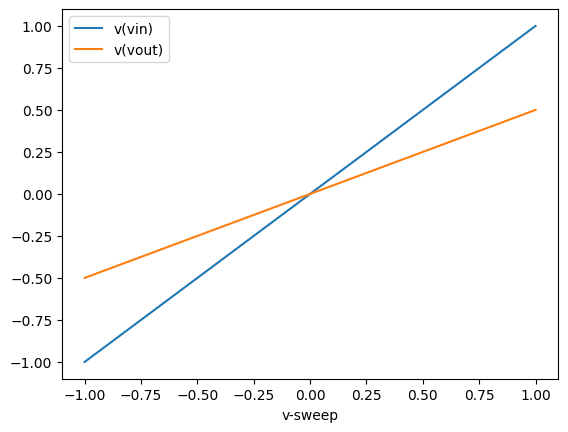

In [16]:
read_data("rclpf_dcsweep.csv", "dc").plot()

### Transient


In [10]:
%%script ngspice -s -o pyspice_tran.log

* test -s
.INCLUDE rc_lpf.cir
V1 vin 0 dc 0 pulse (0 2 50n 2n 2n 50n 100n)
Xrclpf1 vin vout rclpf c2=10p
.options filetype=ascii
.save i(v1) v(vin) v(vout)
*.dc v1 -1 1 0.05
.tran 100p 210n

.CONTROL
    save all
    run                                         ; run * the .tran command
    * set xbrushwidth=2                           ; set linewidth of graph
    * plot v(in) v(out)                           ; plot the simulation results
    set wr_singlescale            ; for wrdata: write the scale only once
    set wr_vecnames               ; for wrdata: write the vector names
    option numdgt = 3             ; for wrdata: 3 digits after decimal point
    wrdata $inputdir/threeloopsac.txt $writestr  ; write ac output v(10) into file for all runs
    rusage                        ; list some resource usage
    * write $inputdir/simout.out v(vin) v(vout)     ; write the results to a file
    wrdata rclpf_tran.csv v(vin) v(vout)     ; write the results to a file
.ENDC
.end




******
** ngspice-36 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2020, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 11 21:44:53 UTC 2024
******

Server mode

Comments and warnings go to log-file: pyspice_tran.log



<Axes: xlabel='time'>

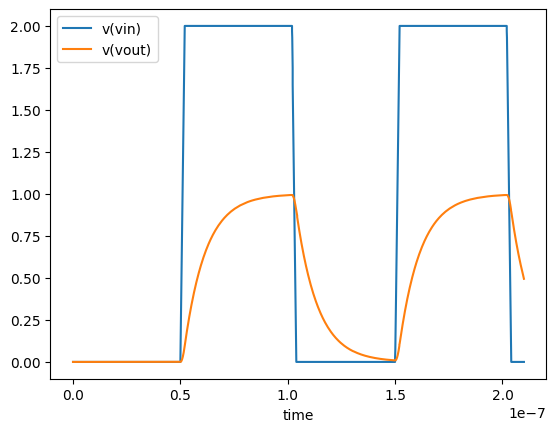

In [17]:
read_data("rclpf_tran.csv", analysis='tran').plot()

### AC


In [12]:
%%script ngspice -s -o pyspice_tran.log

* test -s
.INCLUDE rc_lpf.cir
V1 vin 0 dc 0 ac 1  pulse (0 2 50n 2n 2n 50n 100n)
Xrclpf1 vin vout rclpf c2=10p
.options filetype=ascii
.save i(v1) v(vin) v(vout)
*.dc v1 -1 1 0.05
* .tran 100p 210n
.ac dec 10 10m 100e6

.CONTROL
    save all
    run                                         ; run * the .tran command
    * set xbrushwidth=2                           ; set linewidth of graph
    * plot v(in) v(out)                           ; plot the simulation results
    set wr_singlescale            ; for wrdata: write the scale only once
    set wr_vecnames               ; for wrdata: write the vector names
    option numdgt = 20             ; for wrdata: 3 digits after decimal point
    wrdata $inputdir/threeloopsac.txt $writestr  ; write ac output v(10) into file for all runs
    rusage                        ; list some resource usage
    * write $inputdir/simout.out v(vin) v(vout)     ; write the results to a file
    wrdata rclpf_ac.csv v(vin) v(vout)     ; write the results to a file
.ENDC
.end




******
** ngspice-36 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2020, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 11 21:44:53 UTC 2024
******

Server mode

Comments and warnings go to log-file: pyspice_tran.log



<Axes: xlabel='frequency'>

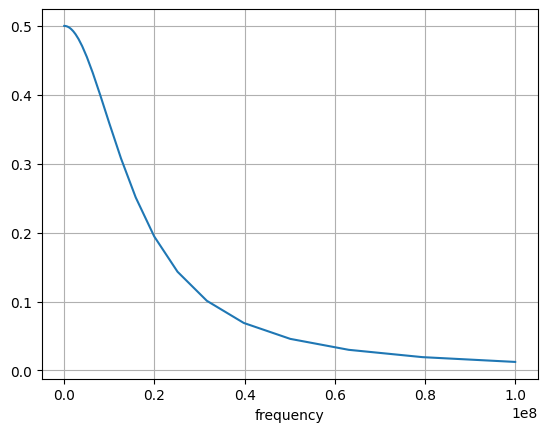

In [18]:
read_data("rclpf_ac.csv", analysis="AC")['v(vout)'].plot(grid=True)

# Appendix


## Multiple simulations in single run


In [14]:
%%script ngspice -s -o pyspice.log

* file inv-example2.cir

* the power supply 2.0 V
Vcc cc 0 2

* the input signal for dc and tran simulation
Vin in 0 dc 0 pulse (0 2 95n 2n 2n 90n 180n)

* the circuit
Mn1 out in 0 0 nm W=2u L=0.18u
Mp1 out in cc cc pm W=4u L=0.18u

* model and model parameters (we use the built-in default parameters for BSIM4)
.model nm nmos level=14 version=4.8.1
.model pm pmos level=14 version=4.8.1

* control language script
.control
tran 100p 500n               ; simulation command 1
set xbrushwidth=2
* plot v(in) v(out)
write $inputdir/outtran.out v(in) v(out)
reset
dc vin 0 2 0.01              ; simulation command 2
* plot v(out)                  ; v(in) not required because it is the x axis already
write $inputdir/outdc.out v(out)
.endc
.end

******
** ngspice-36 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2020, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 11 21:44:53 UTC 2024
******

Server mode

Comments and warnings go to log-file: pyspice.log

